# Example usage: jet latitude and speed statistics
Entire notebook takes 5 seconds to run on Intel i7-10750

## Index
[Woollings et al. 2010](#Woollings-et-al.-2010)  
[Barnes & Polvani 2013](#Barnes-&-Polvani-2013)  
[Barnes & Polvani 2015](#Barnes-&-Polvani-2015)  
[Barnes & Simpson 2017](#Barnes-&-Simpson-2017)  
[Grise & Polvani 2017](#Grise-&-Polvani-2017)  
[Bracegirdle et al. 2018](#Bracegirdle-et-al.-2018)  
[Ceppi et al. 2018](#Ceppi-et-al.-2018)  
[Kerr et al. 2020](#Kerr-et-al.-2020)  
[Compare all](#Compare-all)

preprint describing the package: https://egusphere.copernicus.org/preprints/2023/egusphere-2023-661/

In [1]:
## For calculation of jet latitude and speed statistics
import numpy as np
import xarray as xr
import jsmetrics
print("xarray version:", xr.__version__) ## tested on 0.1.3
print("jsmetrics version:", jsmetrics.__version__) ## tested on 2023.3.0

## For plotting
import matplotlib.pyplot as plt

xarray version: 2023.3.0
jsmetrics version: 0.1.6-alpha


## load in and format ERA5 data

In [2]:
ua = xr.open_dataset('data/era5_u_wind_JF21.nc')


In [3]:
## this is necessary because jsmetrics currently only accept standardised names as input. This may change in the future
ua = ua.rename({'longitude':'lon', 'latitude':'lat', 'level':'plev', 'u':'ua'})


In [4]:
ua

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 91, plev: 6, time: 59)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 85.0 ... 4.0 3.0 2.0 1.0 0.0
  * plev     (plev) int32 100 250 300 500 700 850
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua       (time, plev, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

## Calculate metrics

### Woollings et al. 2010

In [5]:
%%time
## In this example we look at only north atlantic and reduce filter freq and window size for Woollings et al. 2010
# This takes ~300 milliseconds on Intel i7-10750
w10 = jsmetrics.jet_statistics.woollings_et_al_2010(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(700, 850)),\
                    filter_freq=4, window_size=20)

CPU times: user 345 ms, sys: 2.85 ms, total: 348 ms
Wall time: 367 ms


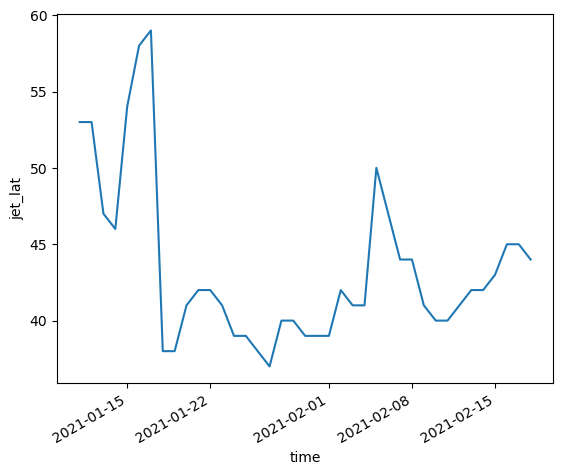

In [6]:
w10['jet_lat'].plot()

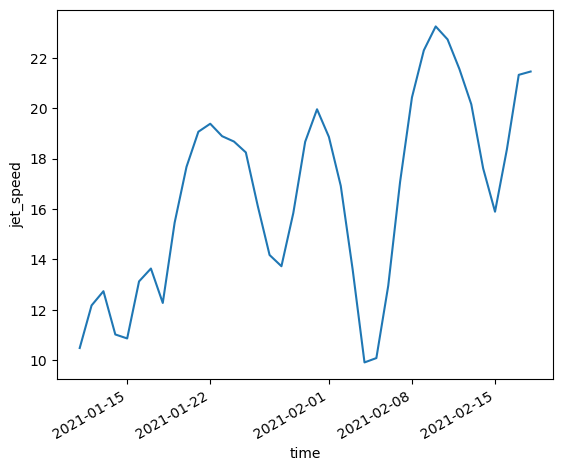

In [7]:
w10['jet_speed'].plot()

### Barnes & Polvani 2013

In [8]:
%%time
# This takes ~500 milliseconds on Intel i7-10750
## Look at only north atlantic and reduce filter freq and window size for Barnes & Polvani
bp13 = jsmetrics.jet_statistics.barnes_polvani_2013(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(700, 850)),\
                    filter_freq=4, window_size=20)

CPU times: user 514 ms, sys: 3.48 ms, total: 518 ms
Wall time: 526 ms


In [9]:
bp13

<xarray.Dataset>
Dimensions:    (lon: 60, lat: 51, plev: 2, time: 59)
Coordinates:
  * lon        (lon) float32 300.0 301.0 302.0 303.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 67.0 68.0 69.0 70.0
  * plev       (plev) int32 700 850
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua         (time, plev, lat, lon) float32 ...
    jet_lat    (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    jet_speed  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    jet_width  (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

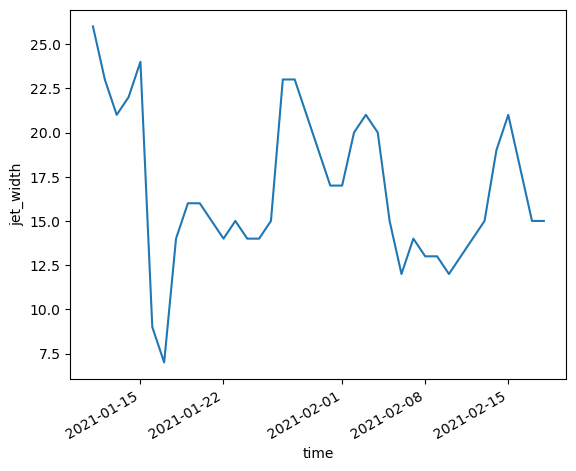

In [10]:
bp13['jet_width'].plot()

### Barnes & Polvani 2015

In [11]:
%%time
# This takes ~250 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
bp15 = jsmetrics.jet_statistics.barnes_polvani_2015(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(700, 850)))

CPU times: user 265 ms, sys: 10.6 ms, total: 275 ms
Wall time: 278 ms


In [12]:
bp15

<xarray.Dataset>
Dimensions:    (lat: 51, time: 59)
Coordinates:
  * lat        (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 67.0 68.0 69.0 70.0
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua         (time, lat) float32 6.265 7.045 7.302 6.569 ... 8.566 6.973 6.54
    jet_lat    (time) float64 46.68 34.18 48.62 51.24 ... 43.82 51.51 27.99
    jet_speed  (time) float64 3.099 4.677 2.556 5.332 ... 9.967 7.867 1.401

### Barnes & Simpson 2017

In [13]:
%%time
# This takes ~30 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
bs17 = jsmetrics.jet_statistics.barnes_simpson_2017(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(700, 850)))

this metric was meant to only work on one plev, please subset plev to one value. For now taking the mean...
CPU times: user 28.3 ms, sys: 111 µs, total: 28.4 ms
Wall time: 27.8 ms


In [14]:
bs17

<xarray.Dataset>
Dimensions:    (lat: 51, time: 6)
Coordinates:
  * lat        (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 67.0 68.0 69.0 70.0
  * time       (time) datetime64[ns] 2021-01-01 2021-01-11 ... 2021-02-20
Data variables:
    ua         (time, lat) float32 3.603 4.651 5.781 ... -1.923 -1.835 -2.256
    jet_lat    (time) float32 27.0 38.0 40.0 44.0 42.0 39.0
    jet_speed  (time) float32 8.334 9.902 17.19 15.99 19.27 11.71

### Grise & Polvani 2017

In [15]:
%%time
# This takes ~250 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
gp17 = jsmetrics.jet_statistics.grise_polvani_2017(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(700, 850)))

CPU times: user 462 ms, sys: 3.47 ms, total: 465 ms
Wall time: 464 ms


In [16]:
gp17

<xarray.Dataset>
Dimensions:    (lon: 60, lat: 51, plev: 2, time: 59)
Coordinates:
  * lon        (lon) float32 300.0 301.0 302.0 303.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float32 20.0 21.0 22.0 23.0 24.0 ... 67.0 68.0 69.0 70.0
  * plev       (plev) int32 700 850
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua         (time, plev, lat, lon) float32 -6.866 -6.221 ... 20.13 21.39
    jet_lat    (time) float64 45.42 54.74 26.44 34.18 ... 45.95 58.62 60.05
    jet_speed  (time) float64 7.87 7.62 8.903 10.32 ... 12.73 15.81 13.03 16.61
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

### Bracegirdle et al. 2018

In [17]:
%%time
# This takes ~150 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
b18 = jsmetrics.jet_statistics.bracegirdle_et_al_2018(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(850, 850)))

CPU times: user 132 ms, sys: 4.18 ms, total: 137 ms
Wall time: 136 ms


In [18]:
b18

<xarray.Dataset>
Dimensions:        (lon: 60, lat: 51, time: 59, season: 1, year: 1)
Coordinates:
  * lon            (lon) float32 300.0 301.0 302.0 303.0 ... 357.0 358.0 359.0
  * lat            (lat) float32 20.0 21.0 22.0 23.0 ... 67.0 68.0 69.0 70.0
    plev           int32 850
  * time           (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Dimensions without coordinates: season, year
Data variables:
    ua             (time, lat, lon) float32 ...
    seasonal_JPOS  (season) float64 41.52
    annual_JPOS    (year) float64 41.52
    seasonal_JSTR  (season) float64 9.782
    annual_JSTR    (year) float64 9.782
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

### Ceppi et al. 2018

In [19]:
%%time
# This takes ~100 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
c18 = jsmetrics.jet_statistics.ceppi_et_al_2018(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(850, 850)))

CPU times: user 97 ms, sys: 4.39 ms, total: 101 ms
Wall time: 99.5 ms


In [20]:
c18

<xarray.Dataset>
Dimensions:        (lon: 60, lat: 51, plev: 1, time: 59)
Coordinates:
  * lon            (lon) float32 300.0 301.0 302.0 303.0 ... 357.0 358.0 359.0
  * lat            (lat) float32 20.0 21.0 22.0 23.0 ... 67.0 68.0 69.0 70.0
  * plev           (plev) int32 850
  * time           (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua             (time, plev, lat, lon) float32 -10.78 -9.664 ... 20.13 21.39
    total_area_m2  (lat, lon) float64 1.162e+10 1.162e+10 ... 4.229e+09
    jet_lat        (time, plev) float64 46.2 46.16 42.01 ... 41.3 45.94 56.45
    jet_speed      (time) float64 6.109 3.312 -1.714 ... 9.023 6.115 9.825
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

### Zappa et al. 2018

In [21]:
%%time
# This takes ~100 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
z18 = jsmetrics.jet_statistics.zappa_et_al_2018(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(850, 850)))

CPU times: user 109 ms, sys: 2.99 ms, total: 112 ms
Wall time: 109 ms


In [22]:
z18

<xarray.Dataset>
Dimensions:        (lon: 60, lat: 51, plev: 1, time: 59)
Coordinates:
  * lon            (lon) float32 300.0 301.0 302.0 303.0 ... 357.0 358.0 359.0
  * lat            (lat) float32 70.0 69.0 68.0 67.0 ... 23.0 22.0 21.0 20.0
  * plev           (plev) int32 850
  * time           (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua             (time, plev, lat, lon) float32 2.571 3.133 ... -1.48 -3.175
    total_area_m2  (lat, lon) float64 4.229e+09 4.229e+09 ... 1.162e+10
    jet_lat        (time, plev) float64 46.68 46.14 41.95 ... 47.7 53.52 60.27
    jet_speed      (time) float64 5.634 3.312 0.0 0.0 ... 12.57 11.12 16.32
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

### Kerr et al. 2020

In [23]:
%%time
# This takes ~450 milliseconds on Intel i7-10750
## For this example we look at only North Atlantic
k20 = jsmetrics.jet_statistics.kerr_et_al_2020(\
                    ua.sel(lon=slice(300, 360), lat=slice(70, 20),\
                           plev=slice(700, 700)))

CPU times: user 501 ms, sys: 7.46 ms, total: 509 ms
Wall time: 508 ms


In [24]:
k20

<xarray.Dataset>
Dimensions:           (lon: 60, lat: 51, time: 59)
Coordinates:
  * lon               (lon) float32 300.0 301.0 302.0 ... 357.0 358.0 359.0
  * lat               (lat) float32 20.0 21.0 22.0 23.0 ... 67.0 68.0 69.0 70.0
    plev              int32 700
  * time              (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-02-28
Data variables:
    ua                (time, lat, lon) float32 -6.866 -6.221 ... 26.31 26.74
    jet_lat           (time, lon) float32 43.0 44.0 44.0 44.0 ... 67.0 67.0 67.0
    smoothed_jet_lat  (time, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.6
    history:      2022-02-25 11:51:26 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...

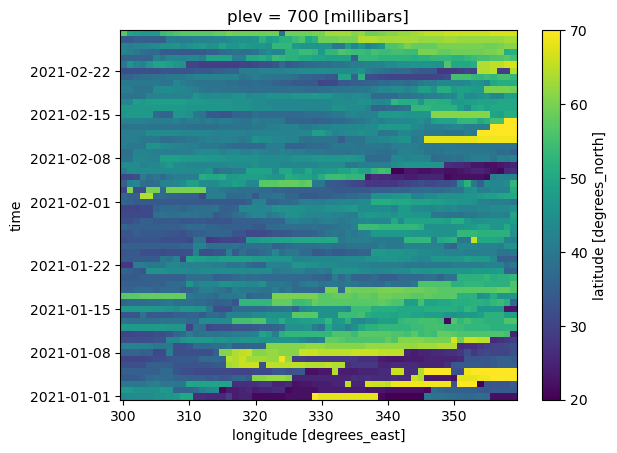

In [25]:
k20['jet_lat'].plot()

## Compare all
For this part to work, please run all the previous cells (should take 30 seconds) 

Text(0.5, 1.0, 'Jet speed comparison')

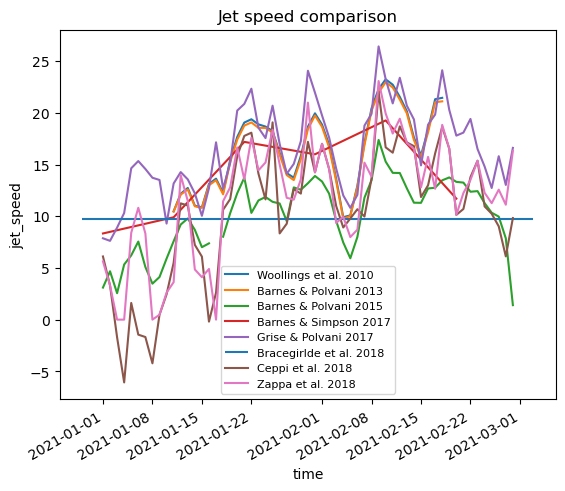

In [26]:
w10['jet_speed'].plot()
bp13['jet_speed'].plot()
bp15['jet_speed'].plot()
bs17['jet_speed'].plot() ## uses a 10-day running mean
gp17['jet_speed'].plot()
plt.hlines(b18['seasonal_JSTR'], plt.gca().get_xlim()[0],  plt.gca().get_xlim()[1])
c18['jet_speed'].plot()
z18['jet_speed'].plot()
plt.legend(['Woollings et al. 2010', 'Barnes & Polvani 2013',\
           'Barnes & Polvani 2015', 'Barnes & Simpson 2017',\
           'Grise & Polvani 2017', 'Bracegirlde et al. 2018',\
            'Ceppi et al. 2018', 'Zappa et al. 2018'], fontsize=8)
plt.title('Jet speed comparison')

Text(0.5, 1.0, 'Jet latitude comparison')

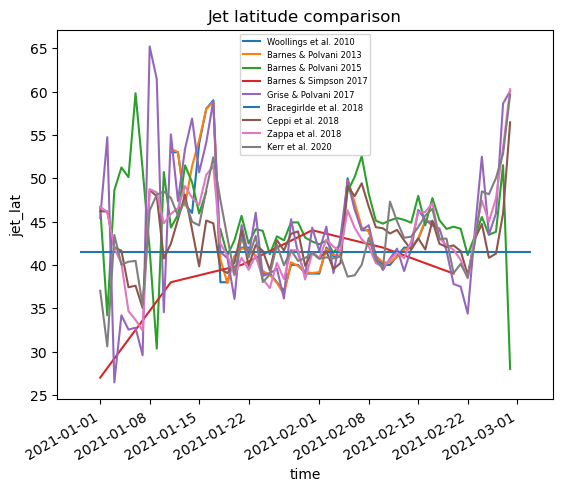

In [27]:
w10['jet_lat'].plot()
bp13['jet_lat'].plot()
bp15['jet_lat'].plot()
bs17['jet_lat'].plot() ## uses a 10-day running mean
gp17['jet_lat'].plot()
plt.hlines(b18['seasonal_JPOS'], plt.gca().get_xlim()[0],  plt.gca().get_xlim()[1])
c18['jet_lat'].plot()
z18['jet_lat'].plot()
k20['jet_lat'].mean('lon').plot()
plt.legend(['Woollings et al. 2010', 'Barnes & Polvani 2013',\
           'Barnes & Polvani 2015', 'Barnes & Simpson 2017',\
           'Grise & Polvani 2017', 'Bracegirlde et al. 2018',\
            'Ceppi et al. 2018', 'Zappa et al. 2018', 'Kerr et al. 2020'], fontsize=6)
plt.title('Jet latitude comparison')